In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

In [18]:
import os

data_files = os.listdir("data")

import datetime
import re

filename_re = re.compile(r"nuc1:rf0-(?P<timestamp>\d+).csv.gz")

def datetime_from_filename(filename):
    match = filename_re.match(filename)
    timestamp = int(match.groupdict()["timestamp"])
    return datetime.datetime.fromtimestamp(timestamp)


import gzip

def get_data(filename):
    x_datas = []
    y_datas = []
    
    with gzip.open(filename, "rt") as data_file:
        if data_file.readline() != "frequency,power\n":
            raise Exception("Oops, this file is different")
        line = data_file.readline()
        while line != '':
            x_data, y_data = line.strip().split(",")
            x_datas.append(float(x_data))
            y_datas.append(float(y_data))
            
            line = data_file.readline()
            
    return x_datas, y_datas


date_map = {datetime_from_filename(_):get_data(os.path.join("data", _)) for _ in data_files}
dates = sorted(date_map.keys())

In [7]:
import ipywidgets

date_widget = ipywidgets.Dropdown(
    options=dates,
    description="Last before split",
    disabled=False)

display(date_widget)

Dropdown(description='Last before split', options=(datetime.datetime(2020, 11, 13, 4, 14, 35), datetime.dateti…

In [14]:
%matplotlib notebook

import matplotlib.pyplot

def plot(datas_1, datas_2, xlim=None, delta_f=0):
    figure, axeses = matplotlib.pyplot.subplots(2, 1,
                                                sharex=True,
                                                sharey=True,
                                                figsize=(16,9))
    
    if xlim is not None:
        axeses[0].set_xlim(xlim)
        
    offset = 0
    
    for (x_data, y_data), datetime_ in datas_1:
        x_data = [_+offset for _ in x_data]
        axeses[0].plot(x_data, y_data, label=datetime_)
        offset += 0.5
        
    for (x_data, y_data), datetime_ in datas_2:
        x_data = [_+offset for _ in x_data]
        axeses[1].plot(x_data, y_data, label=datetime_)
        offset += 0.5
        
    axeses[0].legend()
    axeses[1].legend()
    figure.show()

<IPython.core.display.Javascript object>


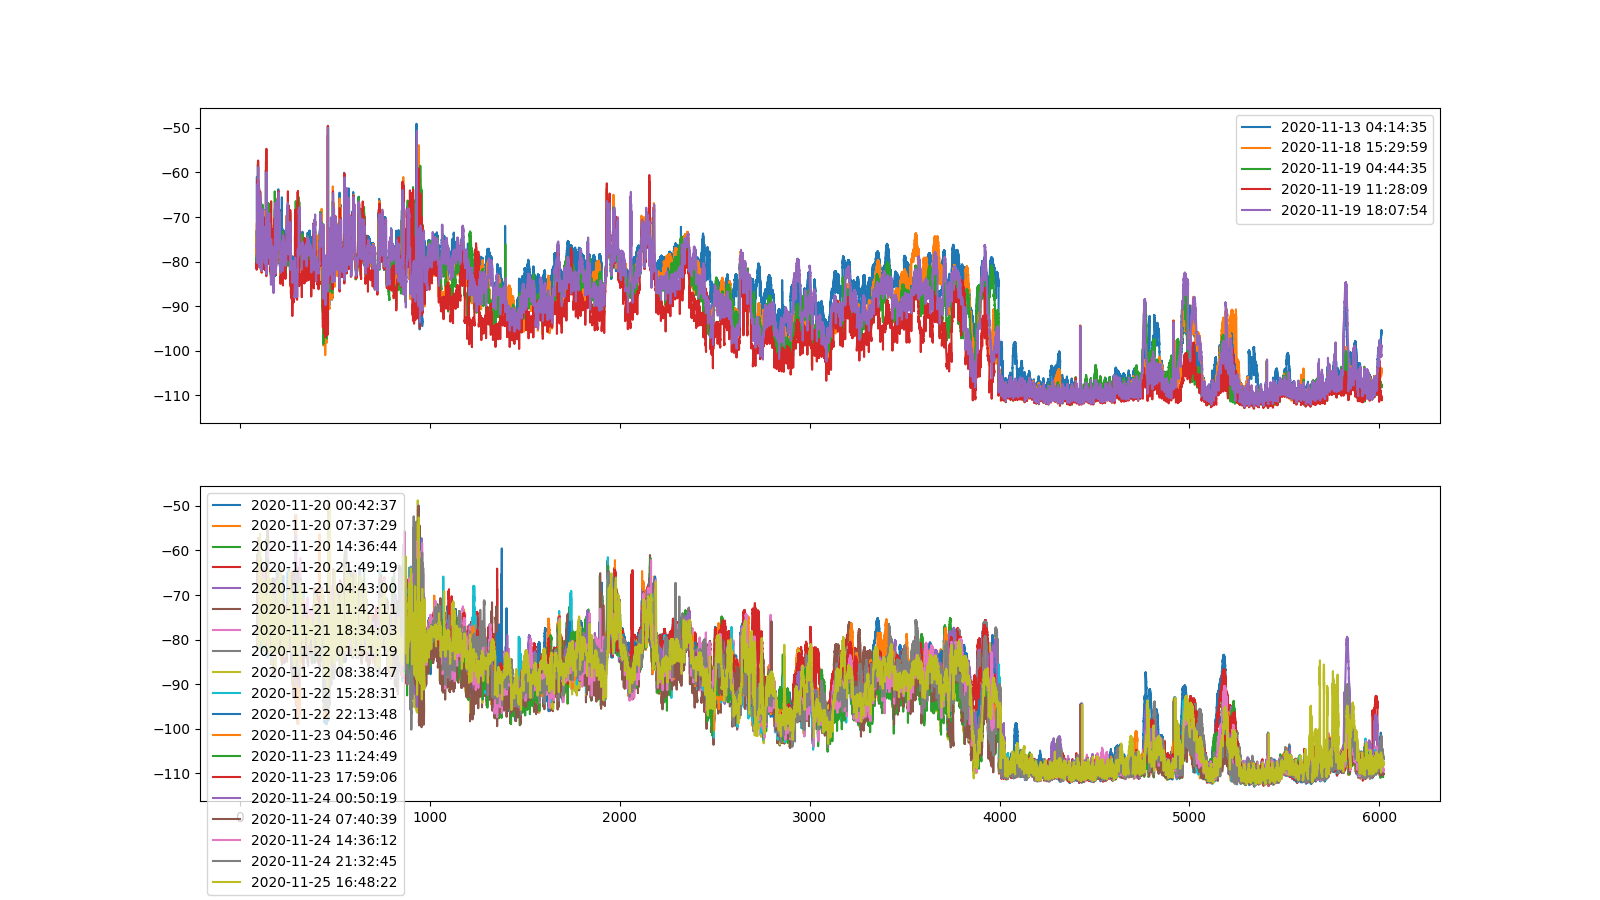

In [21]:
before = [_ for _ in dates if _ <= date_widget.value]
after = [_ for _ in dates if _ > date_widget.value]

plot([(date_map[_], _) for _ in before],
     [(date_map[_], _) for _ in after])

In [48]:
date_widget2 = ipywidgets.Dropdown(
    options=dates,
    description="Display at",
    disabled=False)

display(date_widget2)

date_widget3 = ipywidgets.Dropdown(
    options=dates,
    description="Display at",
    disabled=False)

display(date_widget3)

Dropdown(description='Display at', options=(datetime.datetime(2020, 11, 13, 4, 14, 35), datetime.datetime(2020…

Dropdown(description='Display at', options=(datetime.datetime(2020, 11, 13, 4, 14, 35), datetime.datetime(2020…

<IPython.core.display.Javascript object>


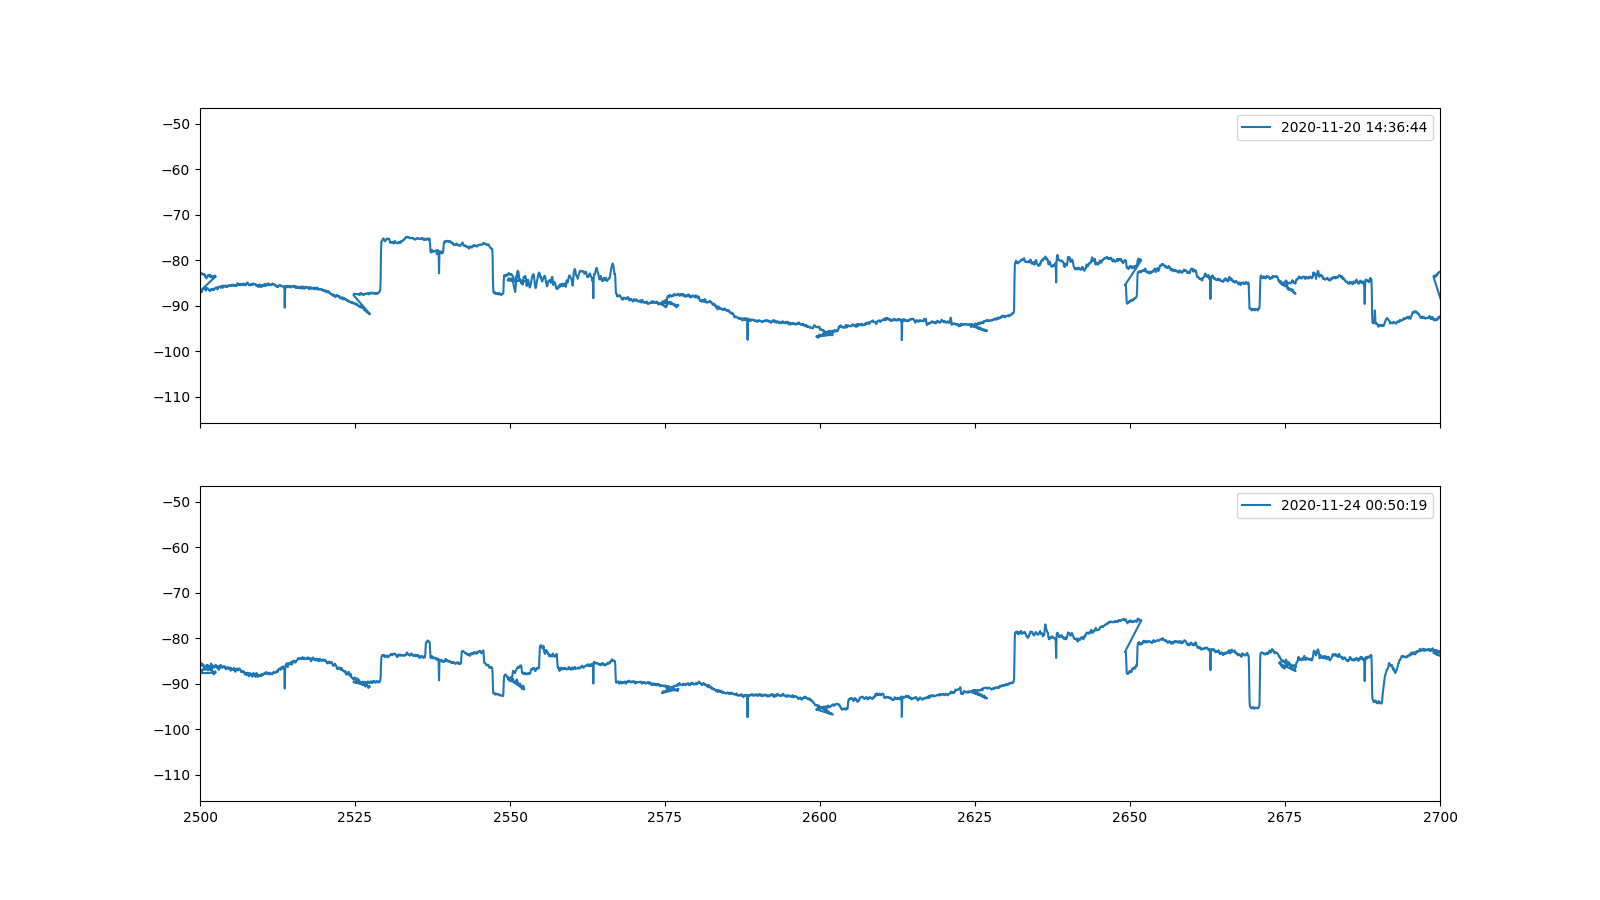

In [62]:
plot([(date_map[date_widget2.value], date_widget2.value)],
     [(date_map[date_widget3.value], date_widget3.value)], xlim=(2500, 2700))